In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)

In [13]:
# Feature lists
standard_features = ["DMP_5", "DMP_10", "DMN_5", "DMN_10", "MACD_8_21_5", "AO_5_10",
    "EMA_15", "MA_20", "KAMA_3_2_10", "CO", "C2O2", "C3O3",
    "net_add_ask_size", "net_add_bid_size", "Bollinger_Upper", "Bollinger_Lower"
]

minmax_features = [
    "ADX_10", "ADX_7", "ADX_5", "STOCHk_7_3_3", "STOCHd_7_3_3", "RSI_7", "time_since_open"
]

unscaled_features = ['market_session', "returns", "volatilities"]
features = standard_features + minmax_features + unscaled_features

In [14]:
sampling_rate = "1s"
predictions_column = ["returns", "volatilities"]
batch_size = 16
epochs = 10
look_back = 32

In [15]:
from tf_preprocessing import process_and_combine_data

start_date = "2024-10-02"
end_date = "2024-10-02"

all_data = process_and_combine_data(start_date, end_date, data_folder="../AAPL_data", sampling_rate=sampling_rate)

print(all_data.columns)

all_data.head()

Index(['trade_ask_size', 'trade_bid_size', 'net_add_ask_size',
       'net_add_bid_size', 'mid_price_open', 'mid_price_high', 'mid_price_low',
       'mid_price_close', 'returns', 'volatilities', 'Returns', 'Target_close',
       'ADX_5', 'ADX_7', 'ADX_10', 'DMP_5', 'DMP_10', 'DMN_5', 'DMN_10',
       'AROONU_7', 'AROOND_7', 'OLL3', 'OLL5', 'OLL10', 'OLL15', 'OHH3',
       'OHH5', 'STOCHk_7_3_3', 'STOCHd_7_3_3', 'MACD_8_21_5', 'RSI_7',
       'AO_5_10', 'EMA_15', 'HMA_10', 'KAMA_3_2_10', 'MA_10', 'MA_20',
       'rmCO(3)', 'rmCO(4)', 'rmCO(5)', 'rmCO(6)', 'Bollinger_Upper',
       'Bollinger_Lower', 'U_minus_L', 'MA20dSTD', 'CO', 'C1O1', 'C2O2',
       'C3O3', 'range', 'OH1', 'time_since_open', 'dow_2', 'market_session'],
      dtype='object')


,trade_ask_size,trade_bid_size,net_add_ask_size,net_add_bid_size,mid_price_open,mid_price_high,mid_price_low,mid_price_close,returns,volatilities,...,MA20dSTD,CO,C1O1,C2O2,C3O3,range,OH1,time_since_open,dow_2,market_session
ts_event,,,,,,,,,,,,,,,,,,,,,
2024-10-02 09:30:24-04:00,354.0,4.0,649.0,487.0,225.835,225.835,225.78,225.780,-0.000244,0.000016,...,0.070009,-0.055,-0.010,2.842171e-14,8.500000e-02,0.055,0.000,24.0,1,0
2024-10-02 09:30:25-04:00,150.0,400.0,-1398.0,1150.0,225.780,225.890,225.78,225.875,0.000421,0.000012,...,0.062230,0.095,-0.055,-1.000000e-02,2.842171e-14,0.110,0.000,25.0,1,0
2024-10-02 09:30:26-04:00,824.0,0.0,-477.0,434.0,225.875,225.880,225.86,225.870,-0.000022,0.000011,...,0.064626,-0.005,0.095,-5.500000e-02,-1.000000e-02,0.020,0.110,26.0,1,0
2024-10-02 09:30:27-04:00,0.0,0.0,206.0,42.0,225.870,225.880,225.87,225.875,0.000022,0.000016,...,0.061024,0.005,-0.005,9.500000e-02,-5.500000e-02,0.010,0.005,27.0,1,0
2024-10-02 09:30:28-04:00,849.0,0.0,526.0,389.0,225.875,225.875,225.84,225.845,-0.000133,0.000011,...,0.055731,-0.030,0.005,-5.000000e-03,9.500000e-02,0.035,0.010,28.0,1,0


In [16]:
all_data.Target_close.value_counts()

Target_close
1.0    10103
2.0     6775
0.0     6498
Name: count, dtype: int64

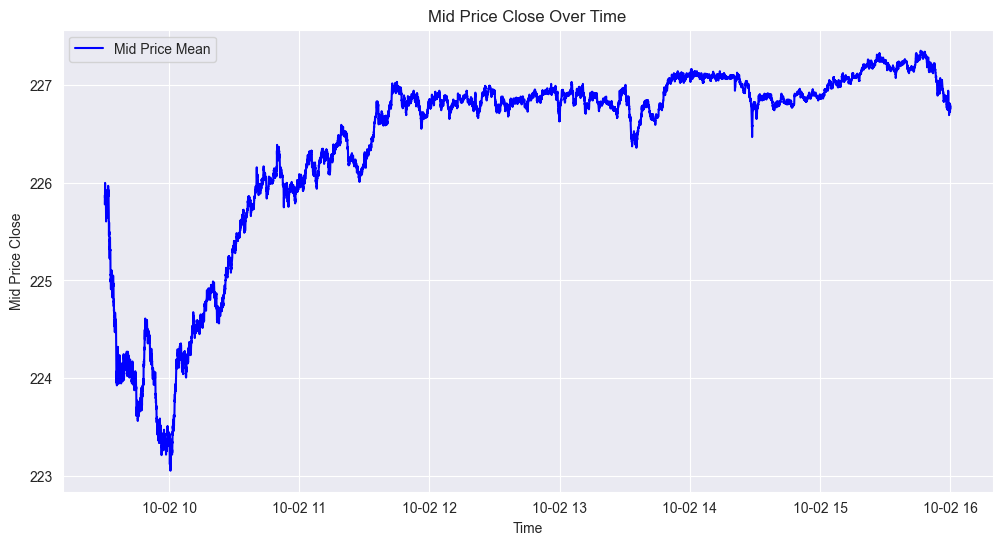

In [17]:
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data["mid_price_close"], label="Mid Price Mean", color="blue")
plt.xlabel("Time")
plt.ylabel("Mid Price Close")
plt.title("Mid Price Close Over Time")
plt.legend()
plt.show()

In [18]:
# Data Splitting
train_size = int(len(all_data) * 0.7)
val_size = int(len(all_data) * 0.1)
test_size = len(all_data) - train_size - val_size

train_df = all_data.iloc[:train_size, :]
val_df = all_data.iloc[train_size:train_size + val_size, :]
test_df = all_data.iloc[train_size + val_size:, :]

In [19]:
from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter

standard_indices = [features.index(f) for f in standard_features]
minmax_indices = [features.index(f) for f in minmax_features]
unscaled_indices = [features.index(f) for f in unscaled_features]

class TimeSeriesScalerGenerator(Sequence):
    def __init__(self, data, target, look_back, batch_size, **kwargs):
        """
        Custom Timeseries Generator with per-sequence scaling and optional oversampling.
        
        Args:
            data (pd.DataFrame): DataFrame with feature columns.
            target (str): Target column name.
            look_back (int): Number of past time steps per sample.
            batch_size (int): Batch size.
        """
        super().__init__(**kwargs)  # Call the parent class constructor with kwargs

        self.data = data[features].values  # Extract feature matrix
        self.targets = data[target].values  # Extract target labels
        self.look_back = look_back
        self.batch_size = batch_size
        self.indices = np.arange(len(data) - look_back)

    def __len__(self):
        """Number of batches per epoch."""
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        """Generates one batch of data."""
        batch_indices = self.indices[idx * self.batch_size : (idx + 1) * self.batch_size]

        # Extract sequences efficiently using list slicing
        batch_data = np.array([self.data[i : i + self.look_back] for i in batch_indices])

        # Preallocate arrays for batch
        X_batch = np.empty((len(batch_indices), self.look_back, len(features)), dtype=np.float32)
        y_batch = np.empty((len(batch_indices), self.targets.shape[1]), dtype=np.float32)

        # Scale each sequence individually
        for i, seq in enumerate(batch_data):
            standard_scaler = StandardScaler()
            minmax_scaler = MinMaxScaler(feature_range=(0, 1))

            seq_standard = standard_scaler.fit_transform(seq[:, standard_indices])
            seq_minmax = minmax_scaler.fit_transform(seq[:, minmax_indices])
            seq_unscaled = (
                seq[:, unscaled_indices] 
                if unscaled_features else np.empty((self.look_back, 0))
            )

            X_batch[i] = np.hstack((seq_standard, seq_minmax, seq_unscaled))
            y_batch[i] = self.targets[batch_indices[i] + self.look_back]

        return X_batch, y_batch


In [20]:
train_gen = TimeSeriesScalerGenerator(train_df, predictions_column, look_back, batch_size)
val_gen = TimeSeriesScalerGenerator(val_df, predictions_column, look_back, batch_size)
test_gen = TimeSeriesScalerGenerator(test_df, predictions_column, look_back, batch_size)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from keras import layers, Model, optimizers

input_size = len(features)

inputs = layers.Input(shape=(look_back, input_size))

# First LSTM layer
x = layers.LSTM(128, return_sequences=True)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

# Second LSTM layer
x = layers.LSTM(64, return_sequences=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

# Dense layers
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)

# Two outputs for regression
returns_output = layers.Dense(1, name="returns")(x)  # Output for returns
volatility_output = layers.Dense(1, name="volatilities")(x)  # Output for volatilities

# Create model
model = Model(inputs=inputs, outputs=[returns_output, volatility_output])

optimizer = optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer, 
    loss={"returns": "mean_squared_error", "volatilities": "mean_squared_error"},
    metrics={"returns": "mae", "volatilities": "mae"}
)

# Train Model
model.fit(train_gen, validation_data=val_gen, epochs=epochs)

Epoch 1/10


c:\Users\Laurent Liao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:731: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


1021/1021 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.4828 - returns_mae: 0.4695 - val_loss: 0.0171 - val_returns_mae: 0.1021
Epoch 2/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 0.0139 - returns_mae: 0.0866 - val_loss: 0.0016 - val_returns_mae: 0.0291
Epoch 3/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 0.0029 - returns_mae: 0.0344 - val_loss: 2.2277e-04 - val_returns_mae: 0.0105
Epoch 4/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 7.1895e-04 - returns_mae: 0.0144 - val_loss: 4.7019e-05 - val_returns_mae: 0.0044
Epoch 5/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 2.7244e-04 - returns_mae: 0.0074 - val_loss: 3.3956e-05 - val_returns_mae: 0.0038
Epoch 6/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 1.5048e-04 - returns_mae: 0.0046 - val_loss: 2.7752e-05 - val_returns_mae: 0.0042
Epoch 7/10
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 9.2450e-05 - returns_mae: 0.0035 - val_loss: 5.6116e-06 - val_returns_mae: 0.0019
Epoch 8/1

In [22]:
# Evaluate the model
test_results = model.evaluate(test_gen)
print("Test Loss (Returns):", test_results[1])
print("Test MAE (Returns):", test_results[3])

print("Test Loss (Volatilities):", test_results[2])
print("Test MAE (Volatilities):", test_results[4])

291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 6.7653e-08 - returns_mae: 2.1628e-04
Test Loss (Returns): 0.00020992349891457707


IndexError: list index out of range